## Clustering

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's use in built iris dataset
from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# remove the target variable so that this dataset can be used to work in an unsupervised learning environment
# we must transform the dataset to an array so that we can plot the graphs of the clusters
iris_X = iris_data.iloc[:, [0,1,2,3]].values
iris_Y = iris_data["Type"]
iris_Y = np.array(iris_Y)

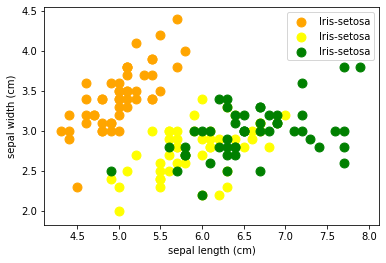

In [4]:
# Let's visualize (2D graph) different classes, this will help us to compare after clustering
plt.scatter(iris_X[iris_Y == 0,0], iris_X[iris_Y == 0,1], s = 80, c = "orange", label = "Iris-setosa")
plt.scatter(iris_X[iris_Y == 1,0], iris_X[iris_Y == 1,1], s = 80, c = "yellow", label = "Iris-setosa")
plt.scatter(iris_X[iris_Y == 2,0], iris_X[iris_Y == 2,1], s = 80, c = "green", label = "Iris-setosa")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

### 3 tpyes of clustering are:
 - **K-Means**
 - **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise)
 - **Agglomerative Clustering** or **Hierarchical Clustering**


## 1. K-Means

In [5]:
# Finding right number of clusters to be formed using Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)  

- We will plot the WCSS obtained from the above code. 
- WCSS or within-cluster sum of squares is a measure of how internally coherent the clusters are.
- K-Means tries to minimize this criterion. 

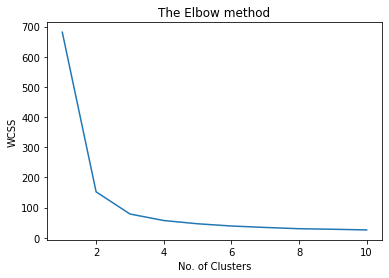

In [6]:
# Plot wcss
plt.plot(range(1, 11), wcss)
plt.title("The Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

- Number of clusters = 3, WCSS is less than 100, which is good for us. So let's take k =3

In [7]:
# Run K-Means for 3 clusters
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(iris_X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

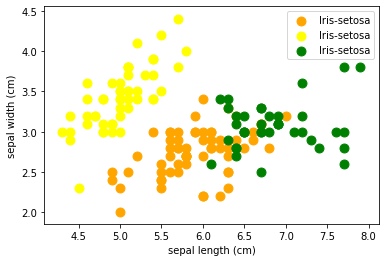

In [8]:
# Lets plot them and compare with our previous plot
plt.scatter(iris_X[y_kmeans == 0,0], iris_X[y_kmeans == 0,1], s = 80, c = "orange", label = "Iris-setosa")
plt.scatter(iris_X[y_kmeans == 1,0], iris_X[y_kmeans == 1,1], s = 80, c = "yellow", label = "Iris-setosa")
plt.scatter(iris_X[y_kmeans == 2,0], iris_X[y_kmeans == 2,1], s = 80, c = "green", label = "Iris-setosa")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

- When compared to the original classes we find that the observations of the class label Iris-setosa has been correctly formed into a separate well-defined cluster, however, for the other two classes, clusters are not as correct. 
- This is mainly because, in the original dataset, these two class labels were overlapping each other which makes it difficult for the clustering algorithm as it works best for clear neat separate observations. 
- Still, the clusters have been formed more or less correctly.

## 2. DBScan
- DBScan, an acronym for **Density-Based Spatial Clustering of Applications with Noise** is a clustering algorithm. 
- It makes clusters based on their densities. It identifies observations in the low-density region as outliers.

In [9]:
# We initialise the DBScan Model with eps=0.42
# eps is distance between two samples for one to be considered as in the neighborhood of the other
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.42)
y_dbscan = dbscan.fit_predict(iris_X)
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  2,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  2,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2,  2, -1,  2,  2, -1, -1,
       -1,  2,  2, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2,  2, -1, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

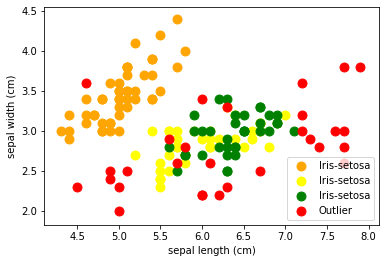

In [10]:
# Let's plot it and compare from orignal plot
plt.scatter(iris_X[y_dbscan == 0,0], iris_X[y_dbscan == 0,1], s = 80, c = "orange", label = "Iris-setosa")
plt.scatter(iris_X[y_dbscan == 1,0], iris_X[y_dbscan == 1,1], s = 80, c = "yellow", label = "Iris-setosa")
plt.scatter(iris_X[y_dbscan == 2,0], iris_X[y_dbscan == 2,1], s = 80, c = "green", label = "Iris-setosa")
plt.scatter(iris_X[y_dbscan == -1,0], iris_X[y_dbscan == -1,1], s = 80, c = "red", label = "Outlier")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

- We find that by using DB Scan some observations are marked as outliers.

## 3. Hierarchical Clustering

- Hierarchical Clustering can be of two types- **Agglomerative** and **Divisive**. 
- We will explore **Agglomerative Clustering** which is a method of clustering which builds a hierarchy of clusters by merging together small clusters. 

In [11]:
# Import library for dendrogram
import scipy.cluster.hierarchy as sch

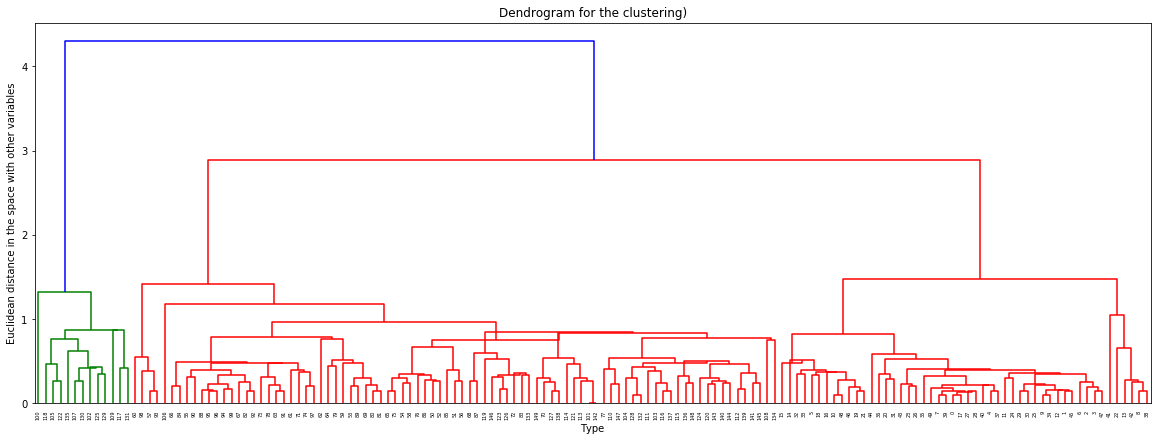

In [12]:
# Plot dendrogram
Z = sch.linkage(iris_X, method="median")
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

In [13]:
# Import library for Agglomerative Clustering ad run for 3 clusters as shown in dendrogram
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
z_agg = agg.fit_predict(iris_X)
z_agg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

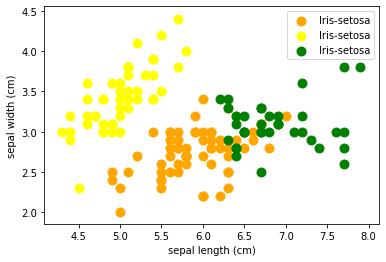

In [14]:
# Let's plot it and compare from orignal plot
plt.scatter(iris_X[z_agg == 0,0], iris_X[z_agg == 0,1], s = 80, c = "orange", label = "Iris-setosa")
plt.scatter(iris_X[z_agg == 1,0], iris_X[z_agg == 1,1], s = 80, c = "yellow", label = "Iris-setosa")
plt.scatter(iris_X[z_agg == 2,0], iris_X[z_agg == 2,1], s = 80, c = "green", label = "Iris-setosa")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

- Here also we found that Iris-setosa has been clearly formed into separate cluster while the other clusters overlap each other.